In [29]:
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
import astropy.units as u
from collections import Counter
import numpy as np
from astropy.wcs import WCS
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [16]:
from astropy.io import fits
from reproject import reproject_interp

In [24]:
meerkat_hdul = fits.open('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits')
meerkat = meerkat_hdul[0].data
wcs_meerkat = WCS(meerkat_hdul[0].header).celestial

aces_reproj_hdul = fits.open('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/cmz_sfr/12m_continuum_commonbeam_circular_reimaged_mosaic_convolved_with_meerkat.fits')
aces_reproj = aces_reproj_hdul[0].data
wcs_aces_reproj = WCS(aces_reproj_hdul[0].header)

In [26]:
shape_out = aces_reproj.shape

# Reproject MeerKAT data to ACES footprint
meerkat_reprojected, _ = reproject_interp((meerkat, wcs_meerkat), wcs_aces_reproj, shape_out=shape_out)

In [5]:
def get_spectral_index(data1, data2, freq1, freq2):
    return np.log(data1/data2)/np.log(freq1/freq2)

In [27]:
aces_freq = 100 * u.GHz
meerkat_freq = 1.284 * u.GHz
SI_map = get_spectral_index(aces_reproj, meerkat_reprojected, aces_freq, meerkat_freq)

/var/folders/xx/rsxxk99x00n0v43ch_649m5c0000gn/T/ipykernel_41753/2114248257.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(data1/data2)/np.log(freq1/freq2)


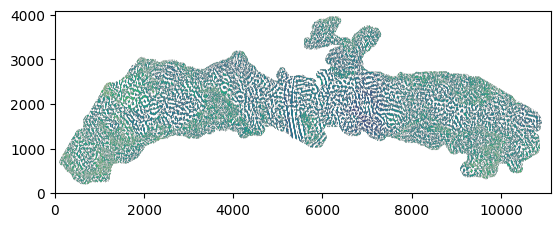

In [31]:
plt.imshow(SI_map, origin = 'lower', vmin = -2, vmax = 2)

In [38]:
ACES_RMS = 2.5e-4
MeerKAT_RMS = 2e-4

mask = np.logical_and(aces_reproj > 5*ACES_RMS, meerkat_reprojected > 5*MeerKAT_RMS)

In [39]:
SI_map[~mask] = np.nan

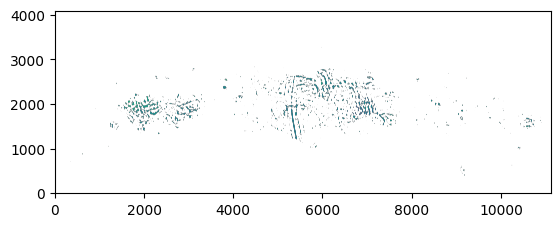

In [40]:
plt.imshow(SI_map, origin = 'lower', vmin = -2, vmax = 2)

In [46]:
meerkat_hdul[0].data = SI_map.value
meerkat_hdul[0].header.update(wcs_aces_reproj.to_header())

In [47]:
SI_map

<Quantity [[nan, nan, nan, ..., nan, nan, nan],
           [nan, nan, nan, ..., nan, nan, nan],
           [nan, nan, nan, ..., nan, nan, nan],
           ...,
           [nan, nan, nan, ..., nan, nan, nan],
           [nan, nan, nan, ..., nan, nan, nan],
           [nan, nan, nan, ..., nan, nan, nan]]>

In [48]:
meerkat_hdul.writeto('ACES_MEERKat_SI_map_masked5RMS.fits', overwrite=True)